Plotting the values of two time series without the time component.

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [54]:
data = pd.read_csv('data.csv')
data2 = pd.read_csv('data2.csv')

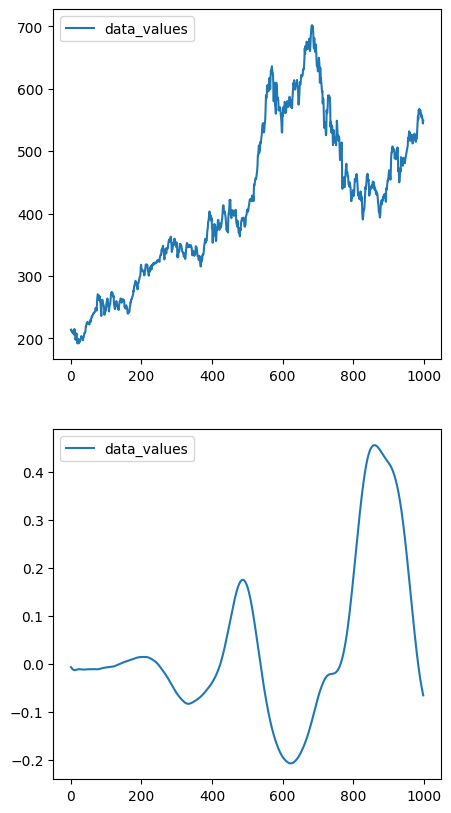

In [55]:
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data.iloc[:1000].plot(y='data_values', ax=axs[0])
data2.iloc[:1000].plot(y='data_values', ax=axs[1])
plt.show()

Lets use the Iris Dataset from scikit for now

In [21]:
from sklearn import datasets
from sklearn.svm import LinearSVC


In [18]:
data = datasets.load_iris()

In [35]:
X = data.data[:, [0, 1]]
y = data.target

In [36]:
# Fit the model
model = LinearSVC()
model.fit(X, y)

LinearSVC()

In [30]:
petal_length = [
    5.5, 5.1, 5.4, 4.1, 5.1, 6.3, 5.6, 5.2, 5.0, 4.3,
    4.9, 3.9, 4.2, 5.0, 4.4, 5.1, 5.6, 4.7, 5.0, 6.1
]

petal_width = [
    1.8, 1.9, 2.3, 1.0, 1.5, 1.8, 2.4, 2.0, 1.9, 1.3,
    1.8, 1.2, 1.3, 1.9, 1.4, 1.5, 2.1, 1.5, 1.9, 1.9
]

# Create DataFrame
targets = pd.DataFrame({
    "petal length (cm)": petal_length,
    "petal width (cm)": petal_width
})

print(targets.head())

   petal length (cm)  petal width (cm)
0                5.5               1.8
1                5.1               1.9
2                5.4               2.3
3                4.1               1.0
4                5.1               1.5


In [39]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

iris = load_iris(as_frame=True)
X_train = iris.data[['petal length (cm)', 'petal width (cm)']]
y_train = iris.target   # map to {1,2,3}

svm_clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0, gamma='scale'))
svm_clf.fit(X_train, y_train)

X_predict = targets[['petal length (cm)', 'petal width (cm)']]
pred = svm_clf.predict(X_predict)
print(pred)


[2 2 2 1 1 2 2 2 2 1 2 1 1 2 1 1 2 1 2 2]


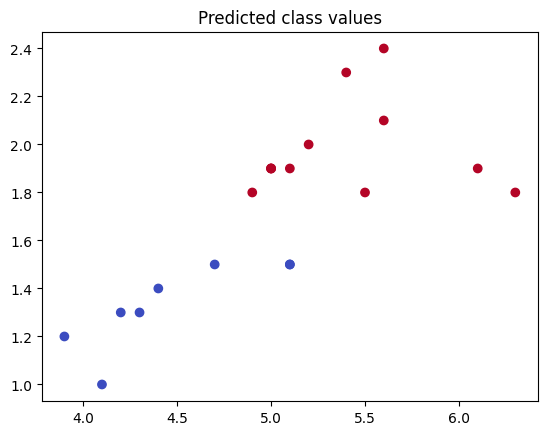

In [41]:
# Visualize predictions and actual values
plt.scatter(X_predict['petal length (cm)'], X_predict['petal width (cm)'],
            c=pred, cmap=plt.cm.coolwarm)
plt.title("Predicted class values")
plt.show()

 Fitting a regression model using data from the California housing market

In [48]:
from sklearn import linear_model
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing(as_frame=True)

# Prepare input and output DataFrames from the 'frame' attribute
X = pd.DataFrame(housing.frame['MedHouseVal'])
y = pd.DataFrame(housing.frame['AveRooms'])

# Fit the model
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression()

In [51]:
new_inputs = [0.14999, 0.1989801, 0.2479702, 0.2969603, 0.3459504, 0.39494051,
 0.44393061, 0.49292071, 0.54191081, 0.59090091, 0.63989101, 0.68888111,
 0.73787121, 0.78686131, 0.83585141, 0.88484152, 0.93383162, 0.98282172,
 1.03181182, 1.08080192, 1.12979202, 1.17878212, 1.22777222, 1.27676232,
 1.32575242, 1.37474253, 1.42373263, 1.47272273, 1.52171283, 1.57070293,
 1.61969303, 1.66868313, 1.71767323, 1.76666333, 1.81565343, 1.86464354,
 1.91363364, 1.96262374, 2.01161384, 2.06060394, 2.10959404, 2.15858414,
 2.20757424, 2.25656434, 2.30555444, 2.35454455, 2.40353465, 2.45252475,
 2.50151485, 2.55050495, 2.59949505, 2.64848515, 2.69747525, 2.74646535,
 2.79545545, 2.84444556, 2.89343566, 2.94242576, 2.99141586, 3.04040596,
 3.08939606, 3.13838616, 3.18737626, 3.23636636, 3.28535646, 3.33434657,
 3.38333667, 3.43232677, 3.48131687, 3.53030697, 3.57929707, 3.62828717,
 3.67727727, 3.72626737, 3.77525747, 3.82424758, 3.87323768, 3.92222778,
 3.97121788, 4.02020798, 4.06919808, 4.11818818, 4.16717828, 4.21616838,
 4.26515848, 4.31414859, 4.36313869, 4.41212879, 4.46111889, 4.51010899,
 4.55909909, 4.60808919, 4.65707929, 4.70606939, 4.75505949, 4.8040496,
 4.8530397,  4.9020298,  4.9510199,  5.00001]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


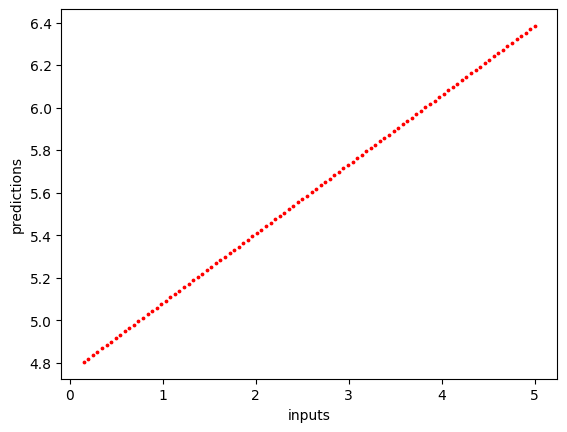

In [53]:
# Generate predictions with the model using those inputs
import numpy as np # Import numpy

predictions = model.predict(np.array(new_inputs).reshape(-1,1)) # Convert to numpy array and reshape

# Visualize the inputs and predicted values
plt.scatter(new_inputs, predictions, color='r', s=3)
plt.xlabel('inputs')
plt.ylabel('predictions')
plt.show()

 The red line shows the relationship that your model found. As the number of rooms grows, the median house value rises linearly.

Inspecting the classification data of hearbeat audio files

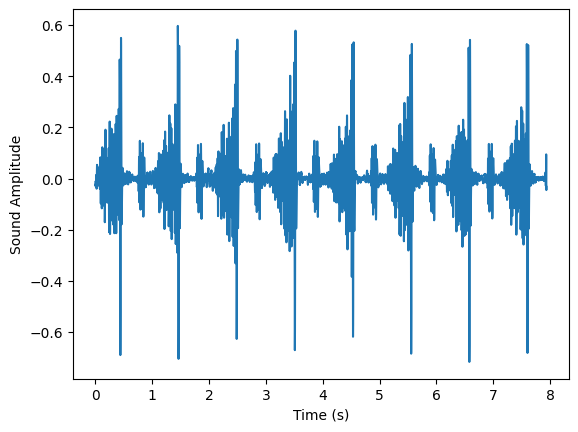

In [64]:
import librosa as lr
from glob import glob
data_dir = '/content/'
# List all the wav files in the folder
audio_files = glob(data_dir + '/*.wav')

# Read in the first audio file, create the time array
audio, sfreq = lr.load(audio_files[0])
time = np.arange(0, len(audio)) / sfreq

# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
plt.show()

The prices dataset contains information about company market value over several years of time.

           symbol       close       volume
date                                      
2010-01-04   AAPL  214.009998  123432400.0
2010-01-04    ABT   54.459951   10829000.0
2010-01-04    AIG   29.889999    7750900.0
2010-01-04   AMAT   14.300000   18615100.0
2010-01-04   ARNC   16.650013   11512100.0


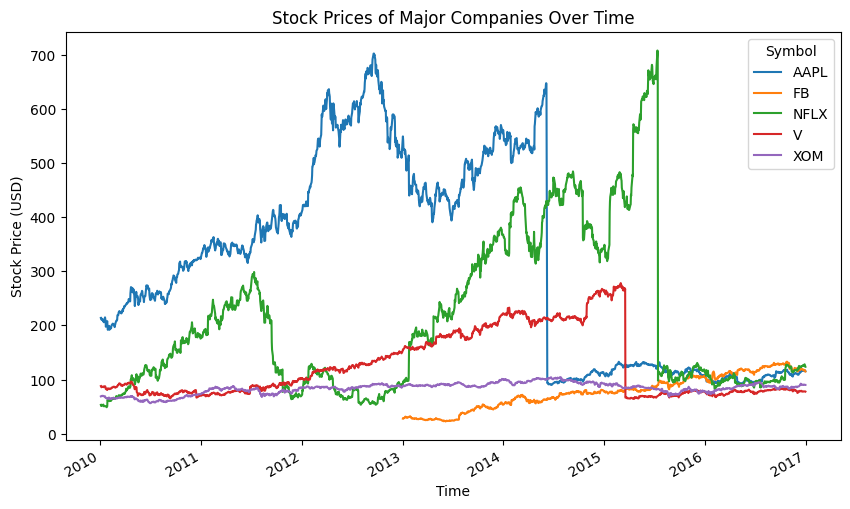

In [71]:
import matplotlib.pyplot as plt
# Read in the data
data = pd.read_csv('prices.csv', index_col=0)

# Convert the index of the DataFrame to datetime
data.index = pd.to_datetime(data.index)

print(data.head())

price_cols = ["AAPL", "FB", "NFLX", "V", "XOM"]
# Filter the DataFrame to include only the specified symbols
data_filtered = data[data['symbol'].isin(price_cols)]

# Plot
fig, ax = plt.subplots(figsize=(10,6))

# Pivot the data to have symbols as columns for easier plotting
data_filtered.pivot_table(index=data_filtered.index, columns='symbol', values='close').plot(ax=ax)

ax.legend(title='Symbol')
plt.xlabel("Time")
plt.ylabel("Stock Price (USD)")
plt.title("Stock Prices of Major Companies Over Time")
plt.show()

Each company's value is sometimes correlated with others, and sometimes not. Also note there are a lot of 'jumps' in there